# Module 3 Homework - Working with complicated data to explore relationships

Created by VIBHITHA NANDAKUMAR (SJSU ID)  
Last updated: OCT 2ND 2025

#### Question 1: ####

blast_results: https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv

Read in the data from the csv file above. Skip all the comment lines, create a header for the dataframe based on the fields list in the comment line that starts with **# Fields:**. Drop the first column `query acc.ver`. Set the `subject acc.ver` as the index of the dataframe. The last column of the dataframe should be `publications`. Show the first five rows of the resulting dataframe.

In [288]:
import pandas as pd
hw3_data = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/blast_results.csv')

In [289]:
# hw3_data.drop(hw3_data.columns[15])
# hw3_data.head()

In [290]:
headers = hw3_data.iloc[4,0]
# print(headers)
headers_list = headers.split(', ')

first = headers_list[0].split(': ')
headers_list[0:0] = first
headers_list.pop(2)
headers_list.pop(0)
# print(headers_list)
print(len(headers_list))

15


In [291]:
hw3_data = hw3_data.drop(hw3_data.columns[[15]], axis=1)
hw3_data.columns = headers_list
hw3_data = hw3_data.drop([0,1,2,3,4,5])
# hw3_data = hw3_data.reset_index()
# hw3_data.head(10)

In [292]:
hw3_data_q1 = hw3_data.drop(hw3_data.columns[[0]], axis=1)
# hw3_data_q1 = hw3_data_q1.reset_index(hw3_data_q1.columns[[0]])

# print(hw3_data_q1.columns)
hw3_data_q1 = hw3_data_q1.set_index('subject acc.ver')
hw3_data_q1.head()

,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications
subject acc.ver,,,,,,,,,,,,,
NP_904328.1,100.000,318.0,0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"1,487",9
AGK29621.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"17,947",47
YP_220563.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"12,106",13
ACM24502.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,"2,319",41
AHG32084.1,99.371,318.0,2.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"18,964",3


#### Question 2: ####
What is the average number of publications?

In [293]:
pub_col = hw3_data_q1.iloc[:, 12]
pub_val = pub_col.values
# print(pub_val)

pub_avg = 0
for i in pub_val:
    if i == '-':
        i = 0
    pub_avg += int(i)
print(f"{pub_avg/len(pub_val)} average publications")


26.18 average publications


#### Question 3: ####
List the `subject acc.ver` that has over 15,000 bonds.

In [294]:
# subAcc_col = hw3_data.iloc[:, 13]
hw3_data_q1.replace(["-"], 0, inplace=True)
hw3_data_q1["bonds"] = hw3_data_q1["bonds"].str.strip().str.replace(",", "")
result = hw3_data_q1.groupby("subject acc.ver")["bonds"].apply(lambda x: int(x) > 15000)
# print(result)


/var/folders/kb/2pqqmm596ms1kz830f_3lnq80000gn/T/ipykernel_35857/2647590593.py:4: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  result = hw3_data_q1.groupby("subject acc.ver")["bonds"].apply(lambda x: int(x) > 15000)


In [295]:
# print(type(result))
print_result = []
for idx, val in result.items():
    if val:
        print_result.append(idx) # redimentary loop to print only 'True' values

print(print_result)

['0806162F', '6G2J_H', 'ABX45285.1', 'ADD46492.1', 'ADG95699.1', 'AGK29621.1', 'AGK29634.1', 'AHG32084.1', 'AHG32149.1', 'AHZ60901.1', 'ASM92364.1', 'ASM92494.1', 'YP_001876469.1', 'YP_002791042.1', 'YP_004123270.1', 'YP_004123350.1', 'YP_004891275.1', 'YP_006073044.1', 'YP_007024956.1', 'YP_007025968.1', 'YP_009092073.1', 'YP_009092074.1', 'YP_009092269.1', 'YP_009093743.1', 'YP_009112408.1', 'YP_009166014.1', 'YP_009178854.1', 'YP_009353908.1', 'YP_009414156.1', 'YP_009414182.1', 'YP_009414363.1', 'YP_009414415.1', 'YP_009450474.1', 'YP_009453754.1', 'YP_009453806.1', 'YP_009538416.1']


#### Question 4: ####
Create a scatter plot that shows the relationship between `% identity` and `alignment length`.  
Include in your answer, do alignment with longer length have higher % identity?

Text(0.5, 1.02, 'Relationship between percent identity and alignment length')

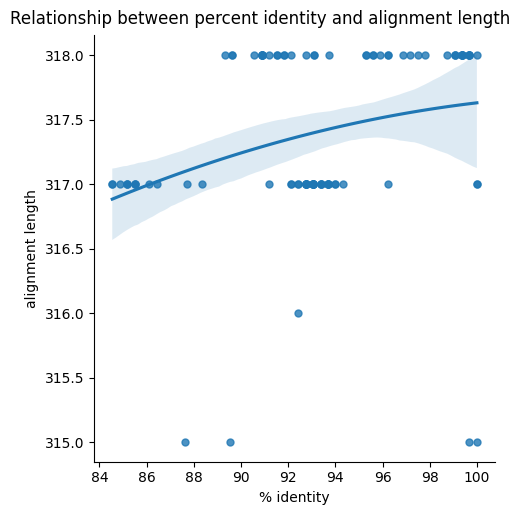

In [296]:
import seaborn as sns

g = sns.lmplot(
    data=hw3_data_q1,
    x="% identity",
    y="alignment length",
    ci=95, # int
    order=2,
    markers='.',
    scatter_kws={'s':100}
)
g.fig.suptitle("Relationship between percent identity and alignment length", y=1.02) 

***In order to approach this, I graphed the percent identity data to the alignment length, mapped a line of best fit, and a confidence interval. There's a positive trend that indicates that it is true that alignments with higher length generally have higher percent identities.***

#### Question 5: ####
Create a plot that shows the correlation between `% identity` and `% positives`.  
Include in your answer and interpretation of what this plot tells you about %identity and %positive.

Text(0.5, 1.02, 'Relationship between percent identity and percent positives')

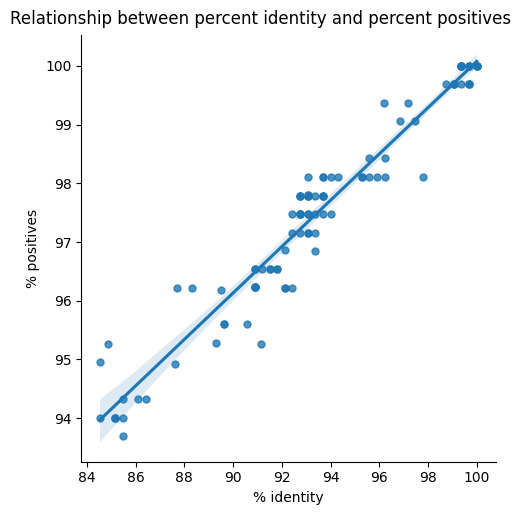

In [297]:
g = sns.lmplot(
    data=hw3_data_q1,
    x="% identity",
    y="% positives",
    ci=95, # int
    order=2,
    markers='.',
    scatter_kws={'s':100}
)
g.fig.suptitle("Relationship between percent identity and percent positives", y=1.02) 

***Using the graph I have generated above, you can clearly spot a positive correlation between percent identity and percent positives. This means as the alignment's percent identity increases, the percent positive (or what I can only explain as similar motifs or sequences that may lead to similar functionalities) increases.***

#### Question 6: ####
Create a histogram to plot the frequency distribution of `%identity`.

Ask: Are most hits high identity (close to 100%) or spread out?
Include in your answer, are most of the subject acc.ver  `%identity` close to 100% or spread out?

Text(0.5, 1.02, 'Frequency distribution of percent identity')

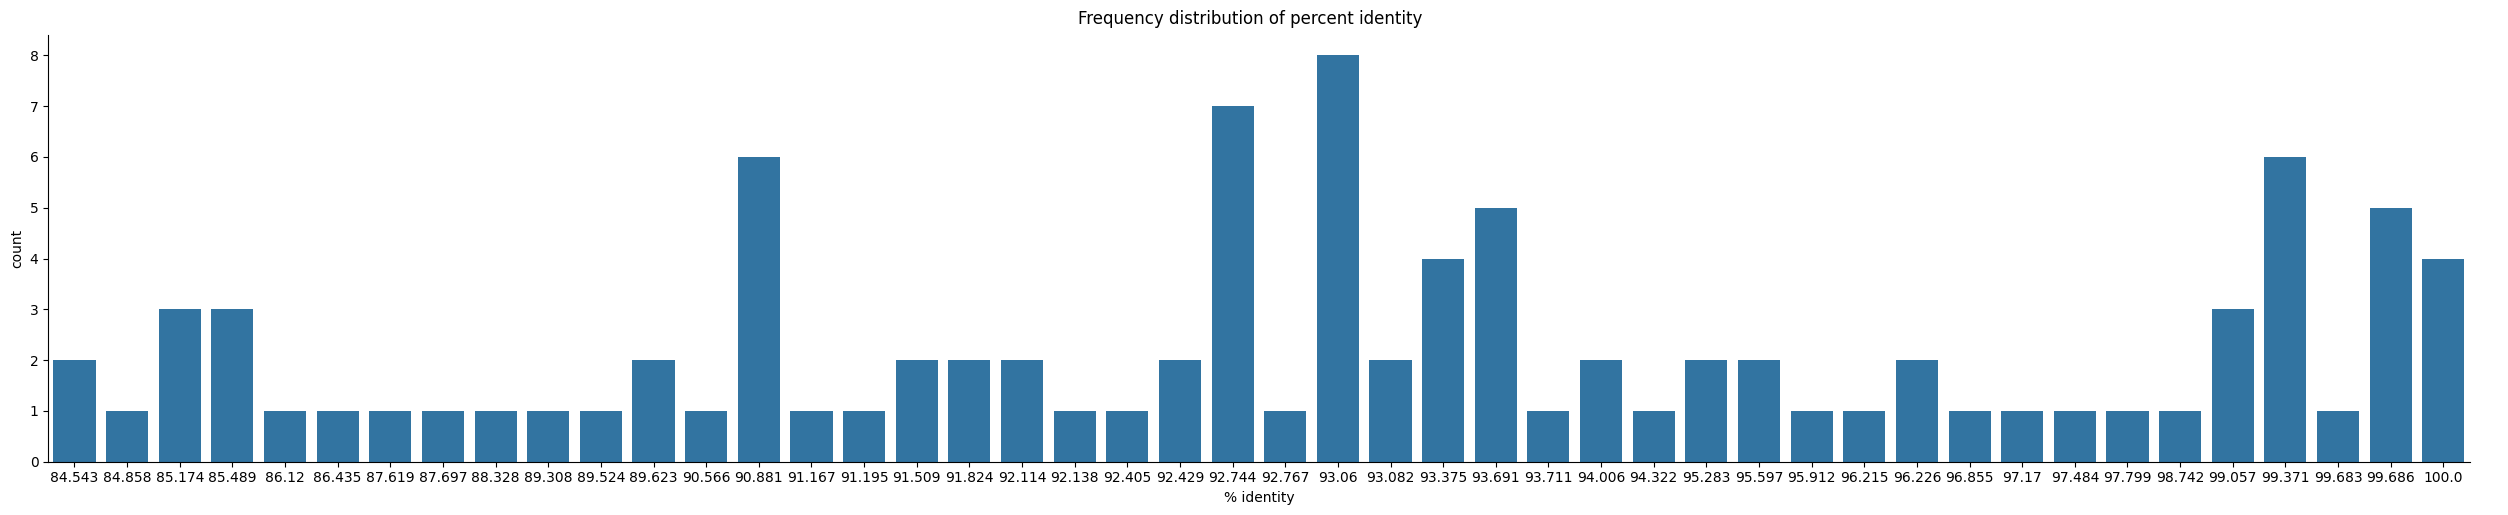

In [298]:
h = sns.catplot(
    data=hw3_data_q1,
    x="% identity",
    kind="count",
    aspect=5
)
h.fig.suptitle("Frequency distribution of percent identity", y=1.02) 

***According to the bar plot I have generated above, most of the percent identities seem to be pretty spread out within the 80%-100% range, with most of the data still being skewed more towards 100%.***

#### Question 7: ####
Add a column `Protein source` to the dataframe from Question 1 based on the data in this csv file: https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv. Merge the data when the `subject acc.ver` from the dataframe equals to `Protein` in the csv file. Entries without a matching protein will have `NA` as `Protein source`.

In [299]:
protein_data = pd.read_csv('https://raw.githubusercontent.com/csbfx/advpy122-data/master/protein_source.csv')
# protein_data.head()


In [300]:
protein_map = dict(zip(protein_data["Protein"], protein_data["Source"])) # making map of the data in new input file
# print(protein_map)

hw3_data['protein source'] = hw3_data['subject acc.ver'].map(protein_map) # creating new column and mapping
hw3_data = hw3_data.fillna("NA") # changing 'NaN' to 'NA'

hw3_data


,query acc.ver,subject acc.ver,% identity,alignment length,mismatches,gap opens,q. start,q. end,s. start,s. end,evalue,bit score,% positives,bonds,publications,protein source
6,YP_220550.1,NP_904328.1,100.000,318.0,0.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"1,487",9,RefSeq
7,YP_220550.1,AGK29621.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,629.0,100.00,"17,947",47,NA
8,YP_220550.1,YP_220563.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"12,106",13,GenPept
9,YP_220550.1,ACM24502.1,99.686,318.0,1.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,99.69,"2,319",41,NA
10,YP_220550.1,AHG32084.1,99.371,318.0,2.0,0.0,1.0,318.0,1.0,318.0,0.0,627.0,100.00,"18,964",3,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101,YP_220550.1,ABX45285.1,92.767,318.0,23.0,0.0,1.0,318.0,1.0,318.0,0.0,551.0,97.48,"17,348",6,NA
102,YP_220550.1,ASP44815.1,93.375,317.0,21.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,96.85,"7,105",19,NA
103,YP_220550.1,YP_009414156.1,84.543,317.0,49.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,94.01,"18,940",37,GenPept
104,YP_220550.1,YP_009414363.1,85.174,317.0,47.0,0.0,1.0,317.0,1.0,317.0,0.0,551.0,94.01,"18,762",5,GenPept
